# Unsupervised Machine Learning Model

### K-means Clustering 
#### Author: Bhavya Gupta

Step 1: Importing the necessary liabraries.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 2: Importing and Reading the data

In [35]:
data=pd.read_csv("https://raw.githubusercontent.com/bhavya1806/The-sparks-foundation-tasks/Task_2/Iris.csv")
df=data.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


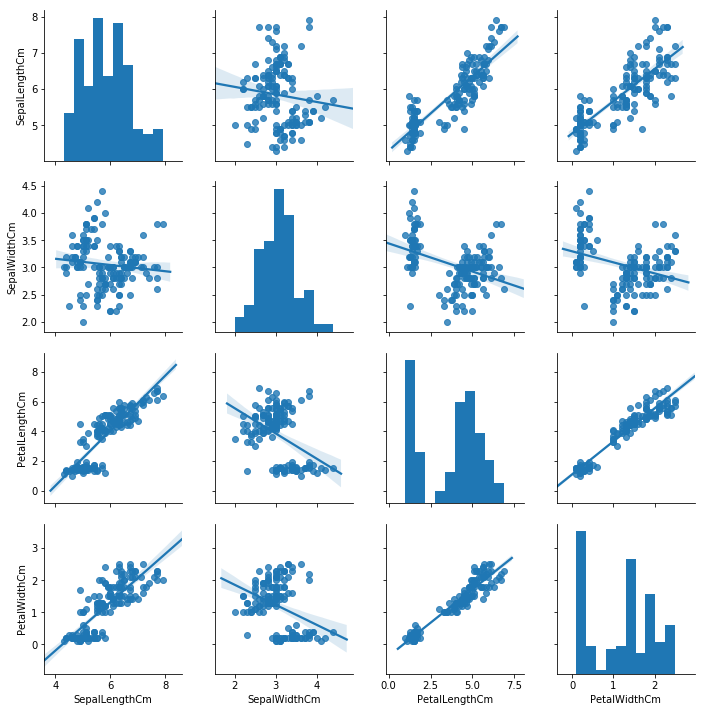

In [37]:
sns.pairplot(df,kind='reg')

Step 3: Finding Optimum level of k

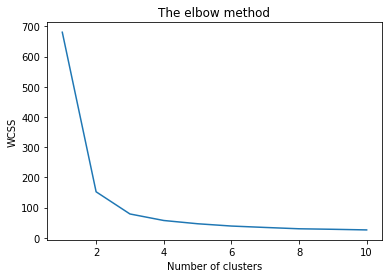

In [38]:
from sklearn import cluster as cl
x=df.iloc[:,0:4].values
wcss=[]
for i in range(1,11):
    Kmeans=cl.KMeans(n_clusters=i)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In order to find the optimal value of K(number of clusters), we are here using "Elbow Method" which plots within cluster sum of squares with respect to number of clusters. When we move from k=2 to k=3, sum of squares within cluster have reduced significantly but after k=3, WCSS have reduced less significantly.Thus we will take k=3

Step 4: Fitting the kMeans Model

In [39]:
k_means=cl.KMeans(n_clusters=3)
KMEANS=k_means.fit(x)

In [40]:
centroids = KMEANS.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [41]:
labels=np.unique(KMEANS.labels_)
labels

array([0, 1, 2])

In [42]:
y_kmeans=KMEANS.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

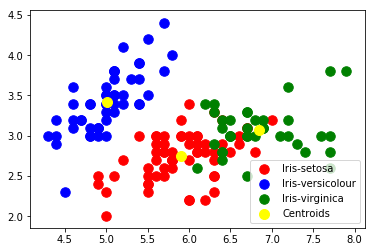

In [43]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 90, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 90, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 90, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(KMEANS.cluster_centers_[:, 0], KMEANS.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()